gradient descent & sklearn

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# read titanic dataset
df_og = pd.read_csv(r"C:\Users\amkb2\Downloads\titanic\train.csv")

In [2]:
# split the data set into train and test sets remove any non-numeric columns
x,y = df_og.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked','Survived']),df_og['Survived']
x=x.replace({'male':0,'female':1}).fillna(0)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

print('size of x_train')
print(x_train.shape)
print('size of x_test')
print(x_test.shape)

size of x_train
(596, 6)
size of x_test
(295, 6)


In [3]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


let's implement logistic regression

In [8]:
def generateXvector(x):
    """
    Taking the original ind var matrix & add a row of 1 which corresponds to x_0
    Parameters:
        x:ind var matrix
    return value:the matrix that contains all the values in the dataset,not include the outcome var
    """
    vectorx=np.c_[np.ones((len(x),1)),x]
    return vectorx
def beta_init(x):
    """Generate an initial val of betas from org ind var matrix
        Parameters:
            x:ind var matrix
        Return val:a vector of beta filled with initial guess
    """
    beta=np.random.randn((x.shape[1])+1,1)
    return beta
def sigmoid_function(x):
    """
    Cal sig val of inputs
    Param:
        x:val
    returnval:the sigmoid val
    """
    return 1/(1+math.e**(-x))
def Logistics_Regression(x,y,learningrate,iterations):
    """
    Find the logistic reg model for data set 
    Parameters:
        x:ind var matrix
        y:dependent var matrix
        learningrate:learningrate of Gradient descent
        iterations:the no. of iterations
    Return val:the final beta vector & the plot of cost function
    """
    y_new=y.values.reshape((len(y),1))
    cost_lst=[]
    vectorx=generateXvector(x)
    beta=beta_init(x)
    m=len(x)
    for i in range(iterations):
        gradients=2/m*vectorx.T.dot(sigmoid_function(vectorx.dot(beta))-y_new)
        beta=beta-learningrate*gradients
        y_pred=sigmoid_function(vectorx.dot(beta))
        cost_value=-np.sum(np.dot(y_new.T,np.log(y_pred)+np.dot((1-y_new).T,np.log(1-y_pred))))/(len(y_pred))
    # cal the loss for each training instance
        cost_lst.append(cost_value)
    plt.plot(np.arange(1,iterations),cost_lst[1:],color='red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylable('Cost')
    return beta
    

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

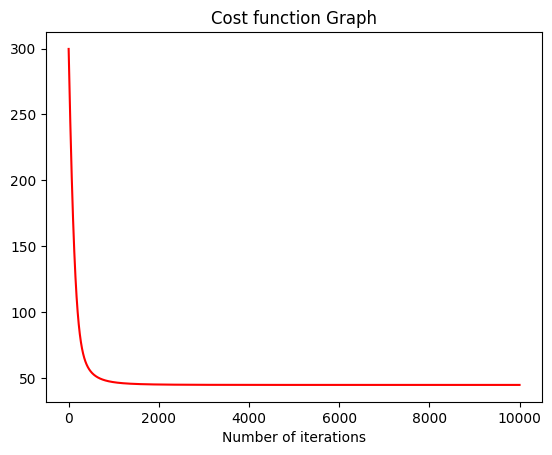

In [12]:
beta=Logistics_Regression(x_train,y_train,0.01,10000)

SKlearn implementation

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [16]:
classifier=LogisticRegression(random_state=0,penalty='none')
classifier.fit(x_train,y_train)
classifier.intercept_,classifier.coef_

C:\Users\amkb2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


(array([-0.68088451]),
 array([[-0.6580703 ,  1.24922165, -0.18441534, -0.32395783, -0.08816187,
          0.20435519]]))

In [17]:
y_pred=classifier.predict(x_train)
accuracy_score(y_train,y_pred)


0.7969798657718121

In [18]:
# for test set
y_pred=classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.8067796610169492

In [19]:
confusion_matrix(y_test,y_pred)

array([[156,  19],
       [ 38,  82]], dtype=int64)